<a href="https://colab.research.google.com/github/HanifRafiq372/Machine-Learning/blob/main/Visualisasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install catboost
!pip install lightgbm
!pip install seaborn
!pip install cartopy
!apt-get -qq install -y graphviz && pip install pydot
!pip install shap
!apt-get -qq install -y libfluidsynth1
!pip install matplotlib-venn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import clear_output

warnings.filterwarnings('ignore')


#Feature Engineering
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold


#Modeling
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor # This line should work after installation


#Model Evaluation
from sklearn.metrics import mean_squared_error

rs = 999

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.1 MB/s eta 0:00:00
E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
df.shape

(6607, 20)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df_na = df.dropna()
print(df_na.shape)
df_na.isnull().sum()

(6378, 20)


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df_na.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df_cleaned = df_na[df_na['Exam_Score'] <= 100]
df_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   object
 1

In [ ]:
df_cleaned.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


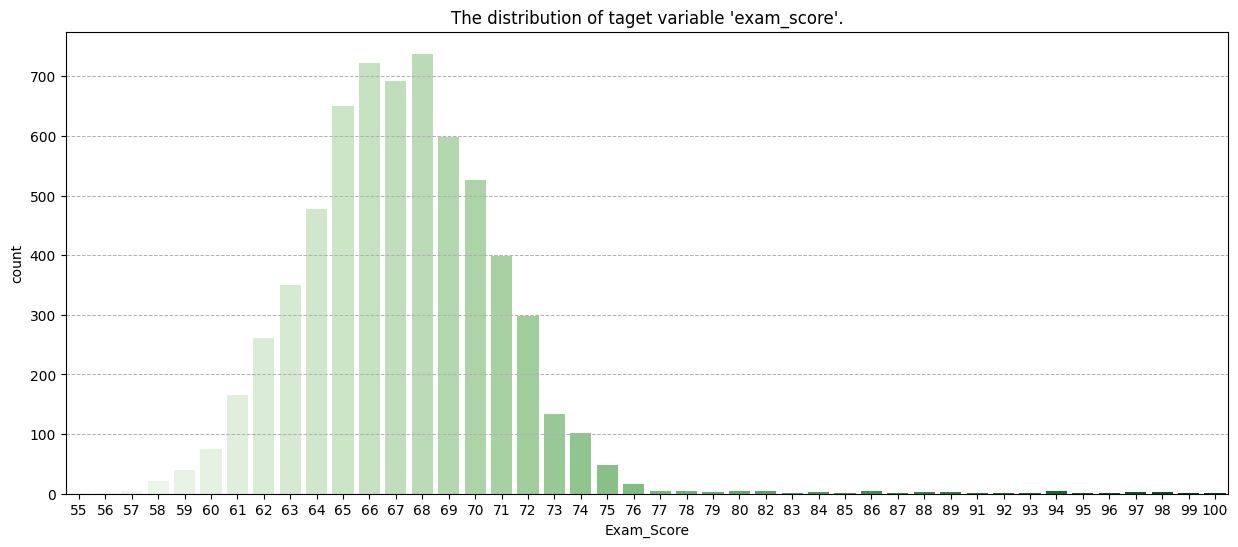

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Assuming 'Exam_Score' is the target variable
target = 'Exam_Score'  # Assign the correct column name to 'target'

plt.figure(figsize=(15, 6))
sns.countplot(x=df_cleaned[target], palette='Greens')

plt.title("The distribution of taget variable 'exam_score'.")
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

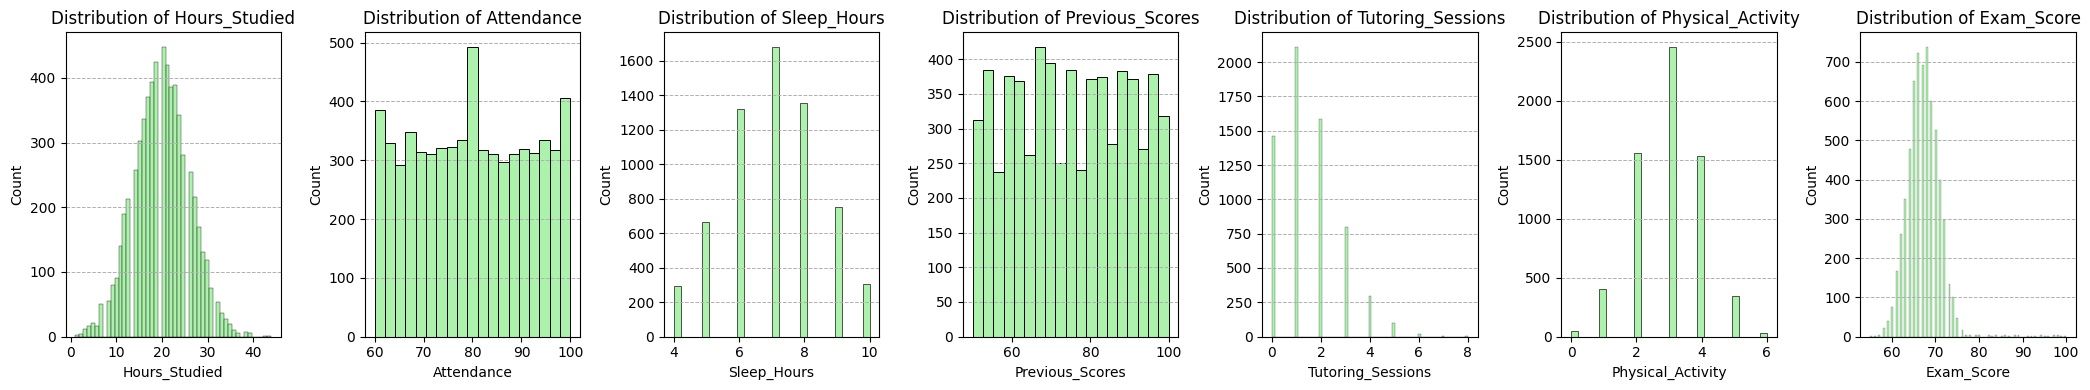

In [ ]:
# Assuming 'Exam_Score' is the target variable
target = 'Exam_Score'  # Assign the correct column name to 'target'

# ----> Define num_col here <----
num_col = df_cleaned.select_dtypes(include=['number']).columns.tolist()

# Adjust the number of subplots to match the number of numerical columns
num_plots = len(num_col)
fig, axes = plt.subplots(1, num_plots, figsize=(3 * num_plots, 4)) # Adjusted figsize

axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.histplot(x=df_cleaned[col], ax=axes[idx], color='lightgreen')
    axes[idx].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    axes[idx].set_title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

<Axes: >

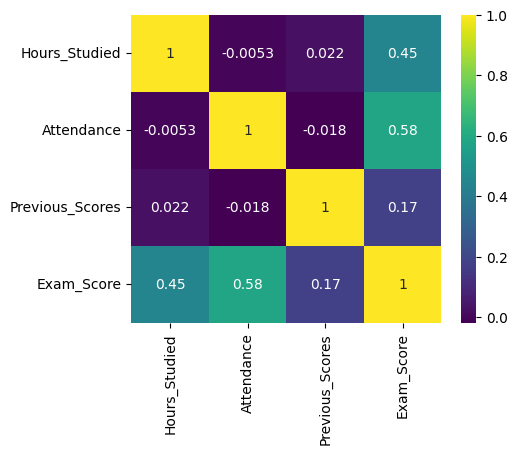

In [ ]:
corr_col = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
df_corr = df_cleaned[corr_col]

corr = df_corr.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='viridis')

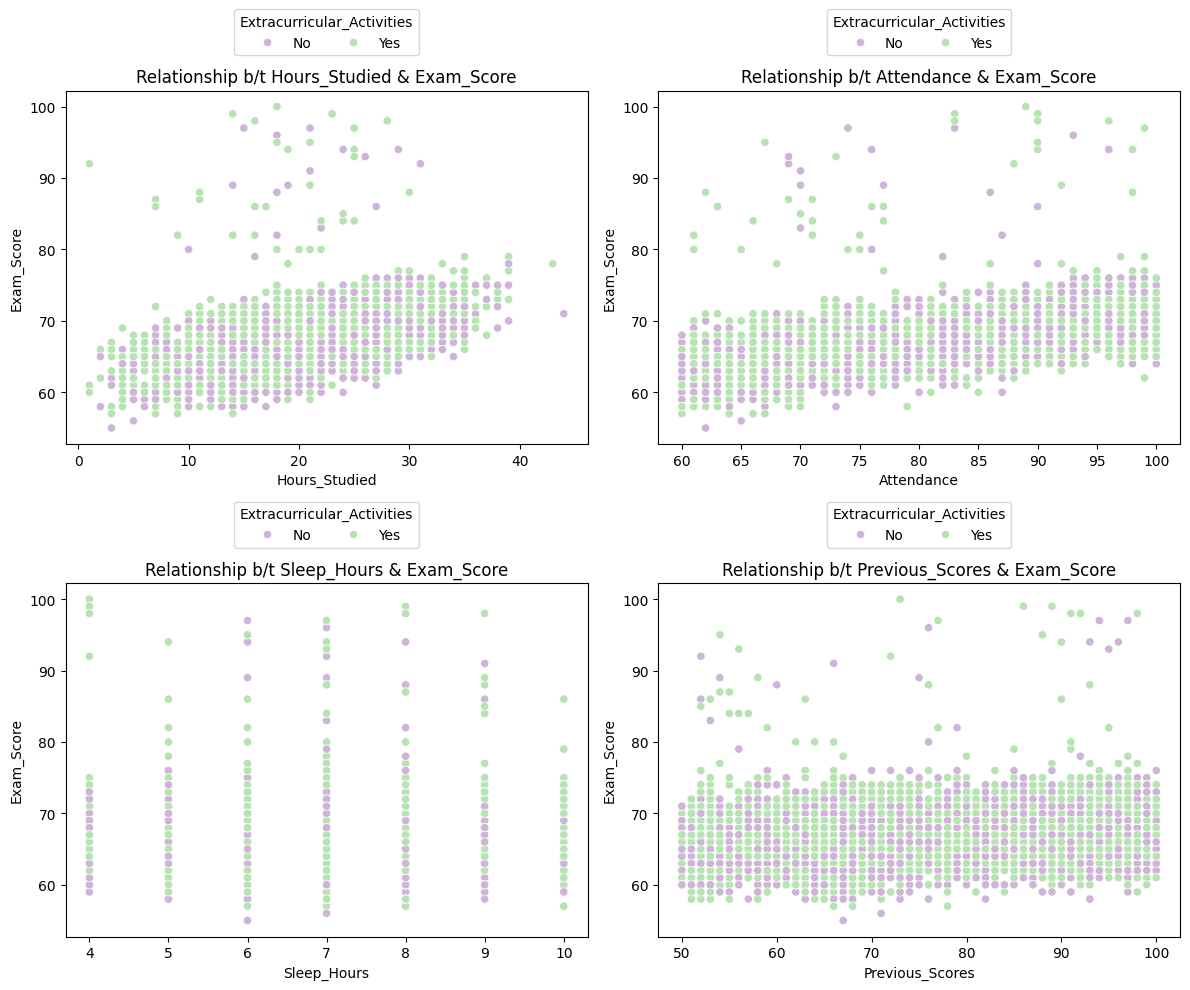

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Change to 2 rows, 2 cols

axes = axes.ravel()

# Limit the loop to the number of available axes
for idx, col in enumerate(num_col[:len(axes)]):  # Iterate only through the first len(axes) elements of num_col
    sns.scatterplot(x=df_na[col], y=df_na[target], ax=axes[idx], palette='PRGn', hue=df_cleaned['Extracurricular_Activities'])
    axes[idx].set_title(f'Relationship b/t {col} & {target}')
    axes[idx].legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2, title='Extracurricular_Activities')
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

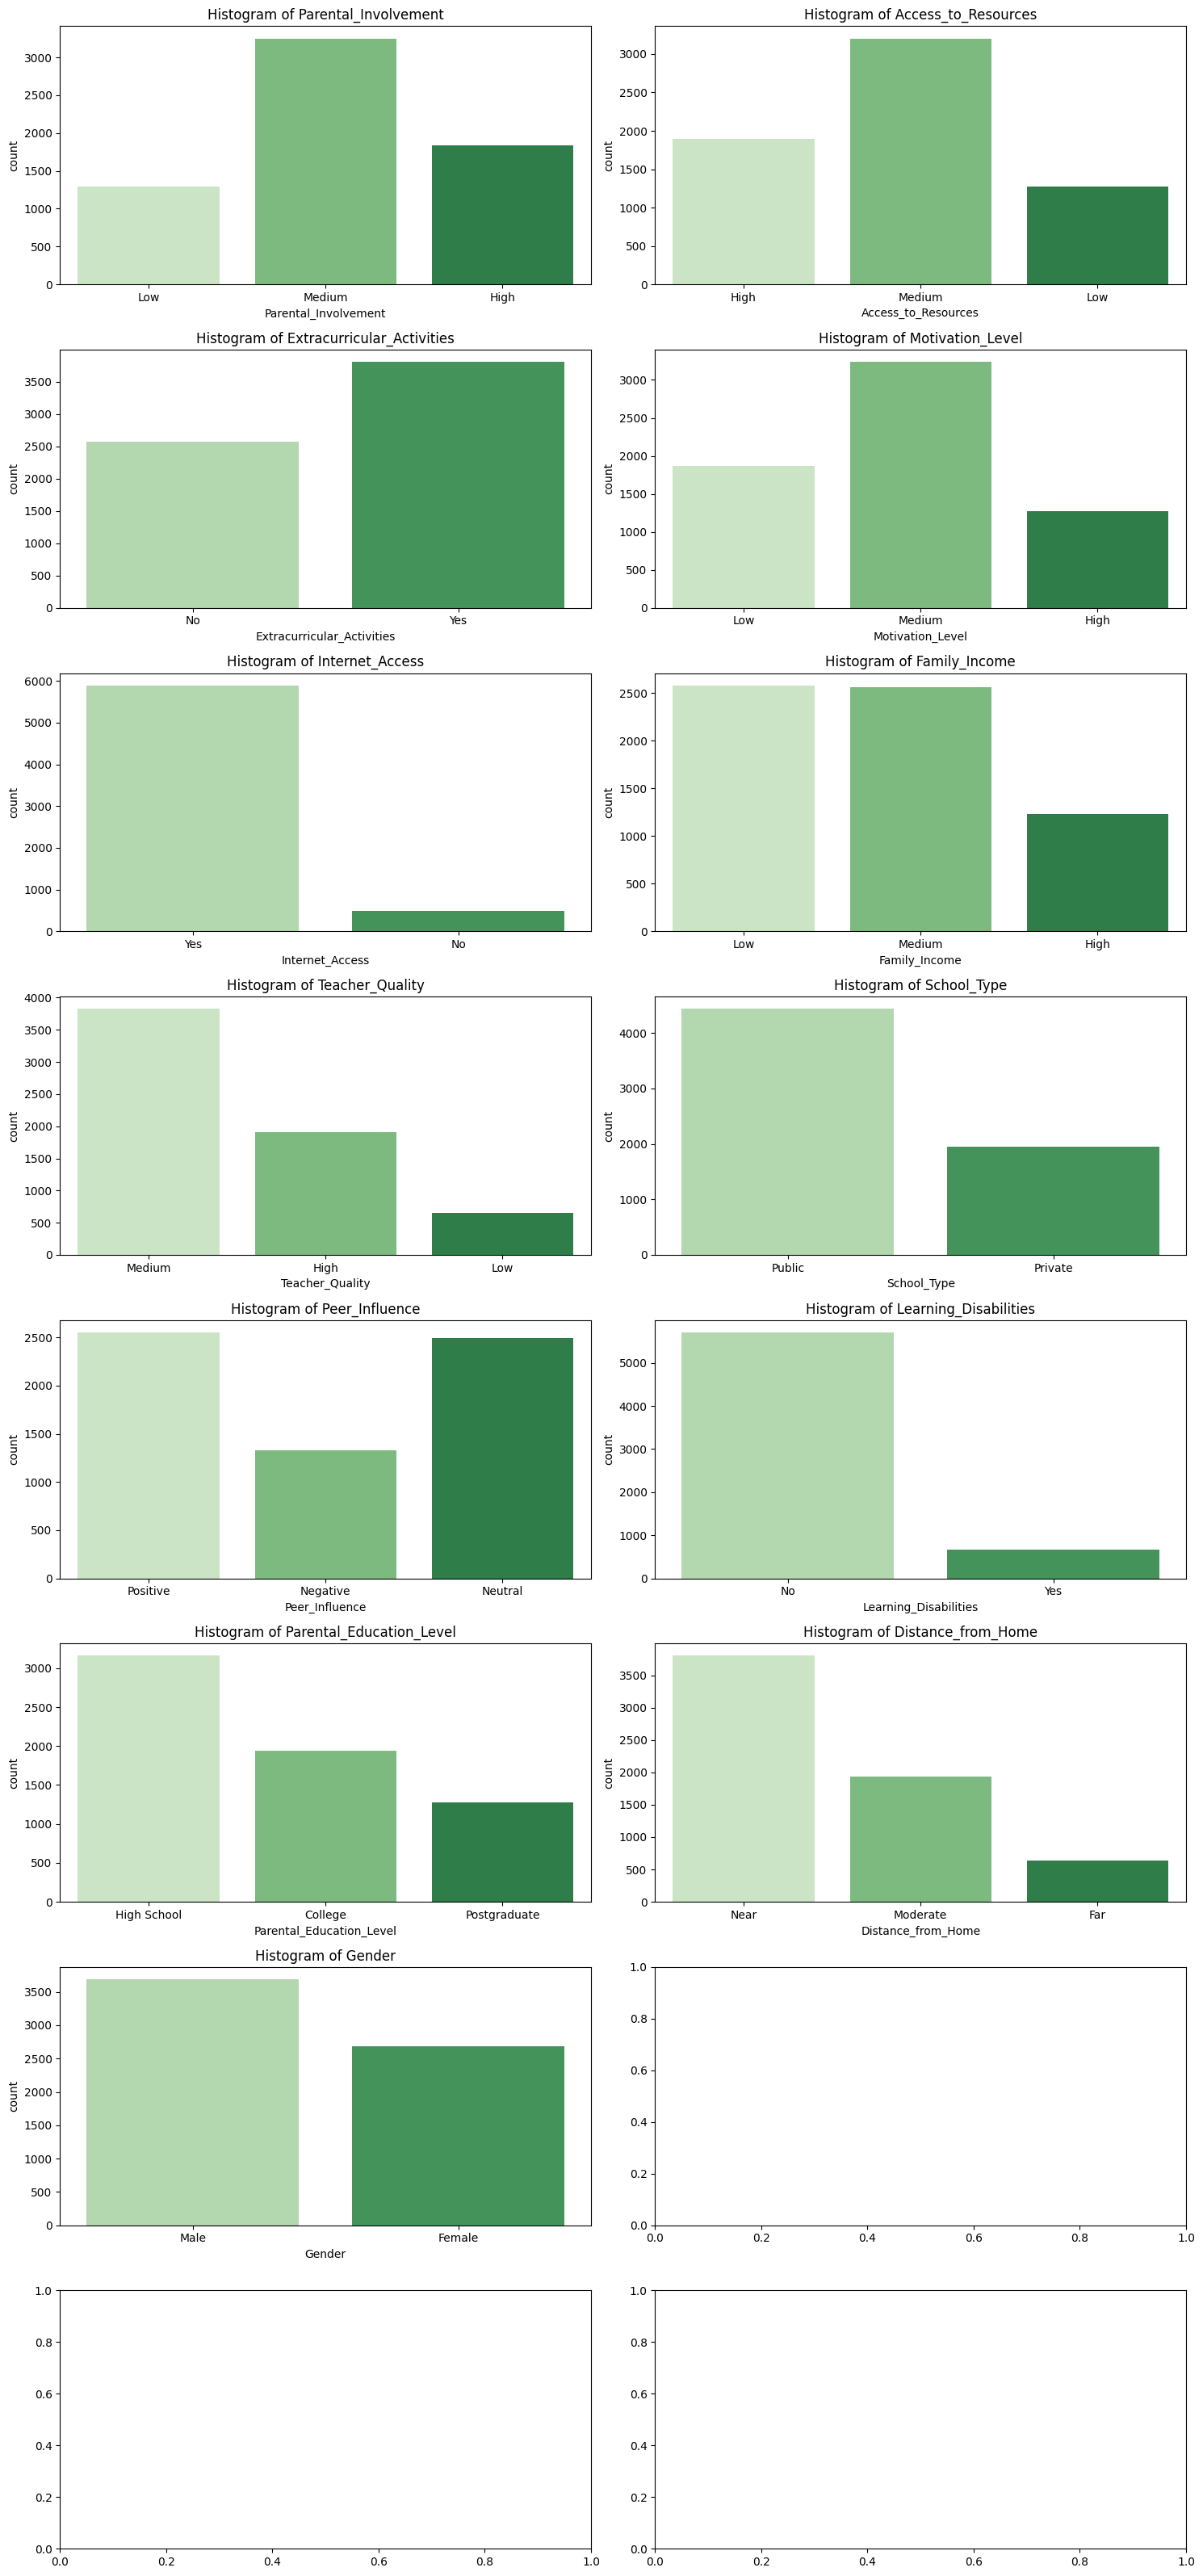

In [ ]:
# ... (previous imports and code)

# Define cat_col here before it is used in the loop
cat_col = df_na.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(8, 2, figsize=(15, 32))

axes = axes.ravel()

for idx, col in enumerate(cat_col):
    sns.countplot(x=df_na[col], ax=axes[idx], palette='Greens')
    axes[idx].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()